In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
IMAGE_SIZE = 256
CHANNELS = 3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'C:/Users/Timothy/breast cancer classification/training/dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 62 images belonging to 2 classes.


In [5]:
train_generator.class_indices

{'benign': 0, 'malignant': 1}

In [6]:
class_names = list(train_generator.class_indices.keys())
class_names

['benign', 'malignant']

In [7]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break


[[[0.95294124 0.9490197  0.93725497]
  [0.95294124 0.9490197  0.93725497]
  [0.9458366  0.9395469  0.93488675]
  ...
  [0.6627451  0.43529415 0.6117647 ]
  [0.6627451  0.43529415 0.6117647 ]
  [0.6627451  0.43529415 0.6117647 ]]

 [[0.95294124 0.9490197  0.93725497]
  [0.95294124 0.9490197  0.93725497]
  [0.9478447  0.9422243  0.9355561 ]
  ...
  [0.6627451  0.43529415 0.6117647 ]
  [0.6627451  0.43529415 0.6117647 ]
  [0.6627451  0.43529415 0.6117647 ]]

 [[0.95294124 0.9490197  0.93725497]
  [0.95294124 0.9490197  0.93725497]
  [0.9498527  0.9449017  0.9362254 ]
  ...
  [0.6884825  0.46720847 0.6323547 ]
  [0.7052163  0.48795837 0.64574164]
  [0.72195    0.50870824 0.65912867]]

 ...

 [[0.94665146 0.9450981  0.94117653]
  [0.9473208  0.9450981  0.94117653]
  [0.9479901  0.9450981  0.94117653]
  ...
  [0.9461276  0.9450981  0.94406855]
  [0.9450981  0.9450981  0.9450981 ]
  [0.9450981  0.9450981  0.9450981 ]]

 [[0.9490197  0.9450981  0.94117653]
  [0.9490197  0.9450981  0.94117653]


In [9]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'C:/Users/Timothy/breast cancer classification/training/dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 25 images belonging to 2 classes.


In [10]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
       'C:/Users/Timothy/breast cancer classification/training/dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 30 images belonging to 2 classes.


In [11]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.9058824  0.77647066 0.8352942 ]
  [0.9058824  0.77647066 0.8352942 ]
  [0.9058824  0.77647066 0.8352942 ]
  ...
  [0.90196085 0.6862745  0.7803922 ]
  [0.90196085 0.6862745  0.7803922 ]
  [0.90196085 0.6862745  0.7803922 ]]

 [[0.9058824  0.77647066 0.8352942 ]
  [0.9058824  0.77647066 0.8352942 ]
  [0.9058824  0.77647066 0.8352942 ]
  ...
  [0.90196085 0.6862745  0.7803922 ]
  [0.90196085 0.6862745  0.7803922 ]
  [0.90196085 0.6862745  0.7803922 ]]

 [[0.9058824  0.77647066 0.8352942 ]
  [0.9058824  0.77647066 0.8352942 ]
  [0.9058824  0.77647066 0.8352942 ]
  ...
  [0.90196085 0.6862745  0.7803922 ]
  [0.90196085 0.6862745  0.7803922 ]
  [0.90196085 0.6862745  0.7803922 ]]

 ...

 [[0.9058824  0.64705884 0.7294118 ]
  [0.9058824  0.64705884 0.7294118 ]
  [0.9058824  0.64705884 0.7294118 ]
  ...
  [0.9215687  0.8470589  0.882353  ]
  [0.9215687  0.8470589  0.882353  ]
  [0.9215687  0.8470589  0.882353  ]]

 [[0.9058824  0.64705884 0.7294118 ]
  [0.9058824  0.64705884 0.7294118 ]


In [12]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

C:\Users\Timothy\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [15]:
62/32

1.9375

In [16]:
25/32


0.78125

In [18]:
history = model.fit(
    train_generator,
    steps_per_epoch=2,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=1,
    verbose=1,
    epochs=20,
)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step - accuracy: 0.6700 - loss: 1.0572 - val_accuracy: 0.6000 - val_loss: 0.8718
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 8s/step - accuracy: 0.6700 - loss: 0.8258 - val_accuracy: 0.6000 - val_loss: 0.7334
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 4s/step - accuracy: 0.4577 - loss: 0.7953 - val_accuracy: 0.6000 - val_loss: 0.6989
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.6742 - loss: 0.6904 - val_accuracy: 0.6000 - val_loss: 0.7635
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 4s/step - accuracy: 0.6284 - loss: 0.7318 - val_accuracy: 0.6000 - val_loss: 0.7217
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.6804 - loss: 0.6417 - val_accuracy: 0.6000 - val_loss: 0.7004
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.6284 - loss: 0.6889 - val_accuracy: 0.6000 - val_loss: 0.6881
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.6742 - loss: 0.6494 - val_accuracy: 0.6000 - val_loss: 0.6807
Epoch 9/20
2/2

In [19]:
scores = model.evaluate(test_generator)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6333 - loss: 0.6501


In [20]:
scores

[0.6501367688179016, 0.6333333253860474]

In [21]:
history

In [22]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 2}

In [23]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [24]:
type(history.history['loss'])

list

In [25]:
len(history.history['loss'])

20

In [26]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.0437637567520142,
 0.829011857509613,
 0.8105446100234985,
 0.69089674949646,
 0.6898974776268005]

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [28]:
val_acc

[0.6000000238418579,
 0.6000000238418579,
 0.6000000238418579,
 0.6000000238418579,
 0.6000000238418579,
 0.6000000238418579,
 0.6000000238418579,
 0.6000000238418579,
 0.6000000238418579,
 0.6000000238418579,
 0.6000000238418579,
 0.6000000238418579,
 0.6000000238418579,
 0.6000000238418579,
 0.6000000238418579,
 0.6000000238418579,
 0.6399999856948853,
 0.6399999856948853,
 0.6000000238418579,
 0.6000000238418579]

In [29]:
acc

[0.6612903475761414,
 0.6612903475761414,
 0.4032258093357086,
 0.6612903475761414,
 0.6612903475761414,
 0.6612903475761414,
 0.6612903475761414,
 0.6612903475761414,
 0.6612903475761414,
 0.6612903475761414,
 0.6612903475761414,
 0.6612903475761414,
 0.6612903475761414,
 0.6774193644523621,
 0.6612903475761414,
 0.6774193644523621,
 0.6774193644523621,
 0.6774193644523621,
 0.6774193644523621,
 0.6612903475761414]

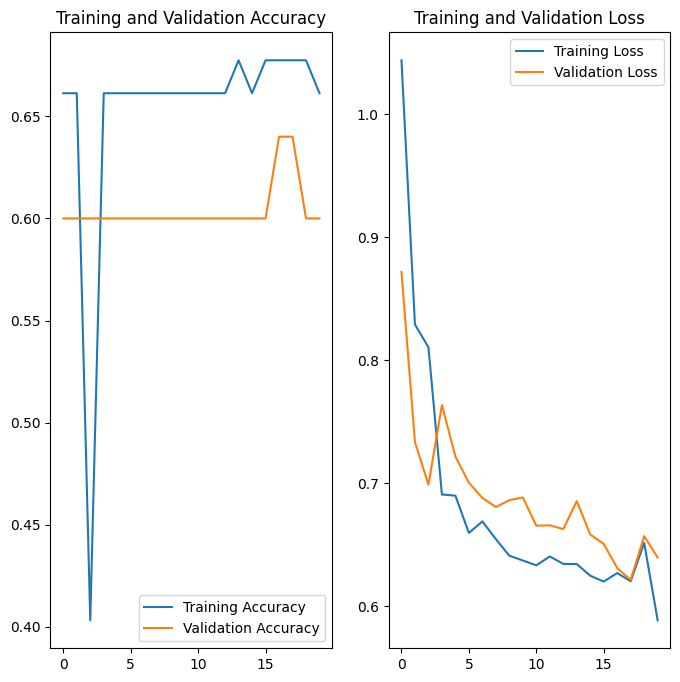

In [30]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict


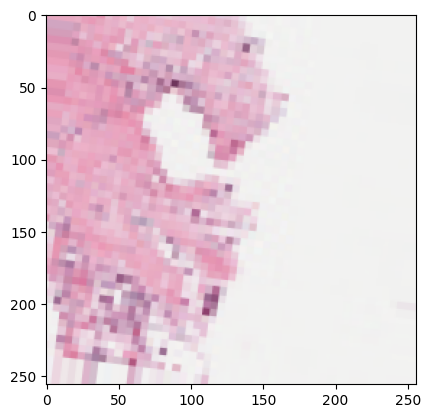

actual label: malignant
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step
predicted label: malignant


In [32]:
import numpy as np
import matplotlib.pyplot as plt

for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])  # Use 'label_batch' instead of 'labels_batch'
    
    print("first image to predict")
    plt.imshow(first_image)
    plt.show()  # Ensure the image is actually displayed
    print("actual label:", class_names[first_label])
    
    batch_prediction = model.predict(image_batch)  # Use 'image_batch' instead of 'images_batch'
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])
    
    break  # Stop after processing the first batch


In [33]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


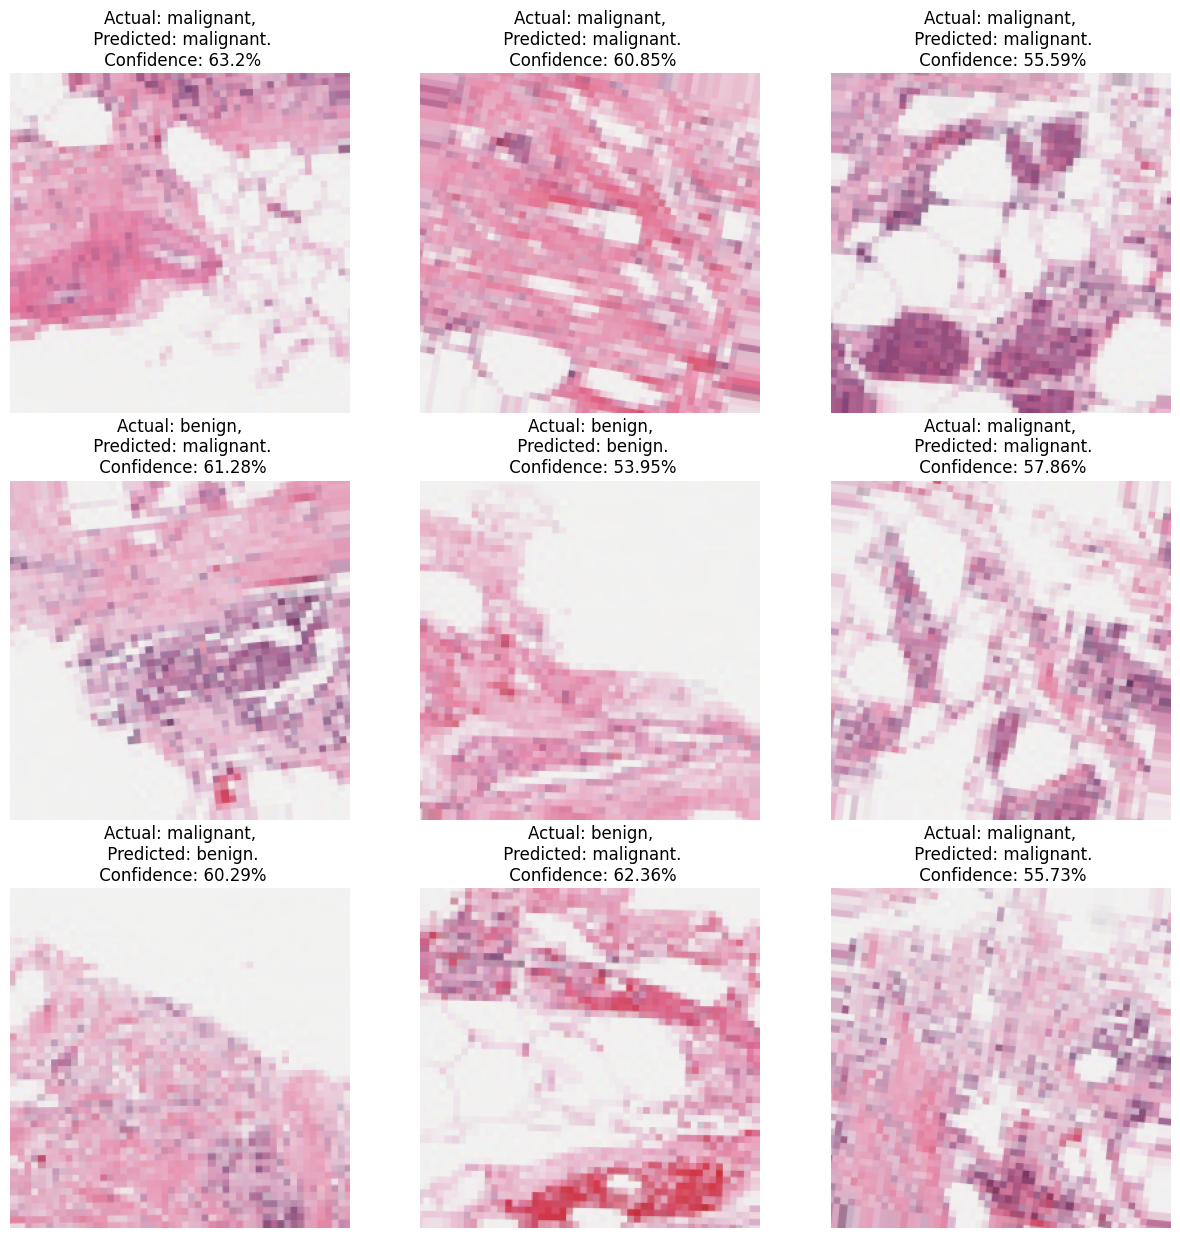

In [34]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [36]:
model.save("C:/Users/Timothy/breastcancer1.h5")
